In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import requests
from ydata_profiling import ProfileReport

# Data Profiler

### Part B: Data Acquisition

#### 5. Import datasets from different sources:
#### - Load CSV file using Pandas.
#### - Parse a JSON file.
#### - Connect to a SQL table and fetch records.
#### - Fetch data from an API (e.g., random user API or dummy REST API).

In [51]:
# Loading CSV File Through Pandas
customer_csv = pd.read_csv("customer_data.csv")
customer_csv

,customer_id,name,age,gender,income,purchases,churn
0,CUST0001,Customer_1,56.0,Female,80004.0,19.0,1
1,CUST0002,Customer_2,NaN,Female,82981.0,18.0,1
2,CUST0003,Customer_3,46.0,Male,104659.0,1.0,0
3,CUST0004,Customer_4,NaN,Male,74553.0,78.0,0
4,CUST0005,Customer_5,60.0,Female,68447.0,47.0,0
...,...,...,...,...,...,...,...
395,CUST0396,Customer_396,20.0,Female,106444.0,29.0,1
396,CUST0397,Customer_397,35.0,Female,62460.0,9.0,0
397,CUST0398,Customer_398,42.0,Female,110397.0,67.0,1
398,CUST0399,Customer_399,59.0,Female,92847.0,25.0,0


In [52]:
# Loading JSON File Through Pandas
customer_json = pd.read_json("customer_data.json")

In [53]:
# Loading An SQL File Through sqlite3
conn = sqlite3.connect("customer_data.db")
cursor = conn.cursor()

cursor.execute("SELECT * FROM customer_data LIMIT 5;")
data = cursor.fetchall()
print("First 5 Records Fetched From The Database : ")
for i in data:
    print(i)

conn.close()

First 5 Records Fetched From The Database : 
('CUST0001', 'Customer_1', 56, 'Female', 80004.0, 19, 1)
('CUST0002', 'Customer_2', None, 'Female', 82981.0, 18, 1)
('CUST0003', 'Customer_3', 46, 'Male', 104659.0, 1, 0)
('CUST0004', 'Customer_4', None, 'Male', 74553.0, 78, 0)
('CUST0005', 'Customer_5', 60, 'Female', 68447.0, 47, 0)


In [54]:
# Loading data From An API Or Dummy User
url = "https://restcountries.com/v3.1/name/india"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print("Country:", data[0]["name"]["common"])
    print("Capital:", data[0]["capital"])
    print("Region:", data[0]["region"])
else:
    print("Error:", response.status_code)

Country: India
Capital: ['New Delhi']
Region: Asia


### Part C: Data Understanding & Cleaning

#### 6. Perform initial exploration:
#### - Use head(), info(), describe() to explore.
#### - Identify missing values and duplicates.

In [55]:
# Performing Data Understanding Functions To Interpret The Data

# Performing Head() To The Data
print(customer_csv.head())

  customer_id        name   age  gender    income  purchases  churn
0    CUST0001  Customer_1  56.0  Female   80004.0       19.0      1
1    CUST0002  Customer_2   NaN  Female   82981.0       18.0      1
2    CUST0003  Customer_3  46.0    Male  104659.0        1.0      0
3    CUST0004  Customer_4   NaN    Male   74553.0       78.0      0
4    CUST0005  Customer_5  60.0  Female   68447.0       47.0      0


In [56]:
# Performing Info() To The Data
print(customer_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  400 non-null    object 
 1   name         400 non-null    object 
 2   age          380 non-null    float64
 3   gender       380 non-null    object 
 4   income       380 non-null    float64
 5   purchases    380 non-null    float64
 6   churn        400 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 22.0+ KB
None


In [57]:
# Performing Describe() To The Data
print(customer_csv.describe())

              age         income   purchases       churn
count  380.000000     380.000000  380.000000  400.000000
mean    44.047368   83748.247368   49.402632    0.307500
std     15.006344   39416.214087   29.436367    0.462036
min     18.000000   20077.000000    1.000000    0.000000
25%     32.000000   47680.000000   24.000000    0.000000
50%     45.000000   84459.500000   49.000000    0.000000
75%     56.000000  118816.500000   74.000000    1.000000
max     69.000000  149922.000000   99.000000    1.000000


In [58]:
# Identifying Missing Values And Duplicates In the datset
print(f"NULL Values In The Dataset Is : \n{customer_csv.isnull().sum()}")
print()
print(f"Duplicates Values In The Dataset Is : \n{customer_csv.duplicated().sum()}")

NULL Values In The Dataset Is : 
customer_id     0
name            0
age            20
gender         20
income         20
purchases      20
churn           0
dtype: int64

Duplicates Values In The Dataset Is : 
0


#### 7. Apply data cleaning:
#### - Handle missing data (imputation or removal).
#### - Correct inconsistent data types.
#### - Drop irrelevant columns.

In [59]:
# Handling Missing Values Through Fillna()
customer_csv["age"] = customer_csv["age"].fillna(customer_csv["age"].mode()[0])

customer_csv["gender"] = customer_csv["gender"].fillna(customer_csv["gender"].mode()[0])

customer_csv["income"] = customer_csv["income"].fillna(customer_csv["income"].median())

customer_csv["purchases"] = customer_csv["purchases"].fillna(customer_csv["purchases"].mode()[0])

In [60]:
# Correcting Inconsistent Data Types
# This Will Convert The Mixed Numeric Column Into Proper Numeric Columns And All Errors Will Become NaN
customer_csv["age"] = pd.to_numeric(customer_csv["age"],errors="coerce").astype("Int64")

customer_csv["purchases"] = pd.to_numeric(customer_csv["purchases"],errors="coerce").astype("Int64")

In [61]:
# Dropping Irrelevant Columns
customer_csv.drop(columns=["customer_id","name"])

,age,gender,income,purchases,churn
0,56,Female,80004.0,19,1
1,50,Female,82981.0,18,1
2,46,Male,104659.0,1,0
3,50,Male,74553.0,78,0
4,60,Female,68447.0,47,0
...,...,...,...,...,...
395,20,Female,106444.0,29,1
396,35,Female,62460.0,9,0
397,42,Female,110397.0,67,1
398,59,Female,92847.0,25,0


### Part D: Exploratory Data Analysis (EDA)

#### 8. Perform Univariate Analysis:
#### - Distribution plots of Age, Income, and Purchases.

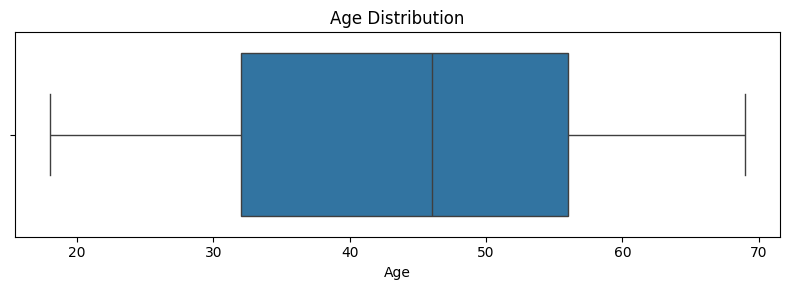

In [62]:
# Now We Will Perform Univariate Analysis Between Some Variables

# Boxplot Of "Age"
plt.figure(figsize=(8,3))
sns.boxplot(customer_csv["age"],orient="h",)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

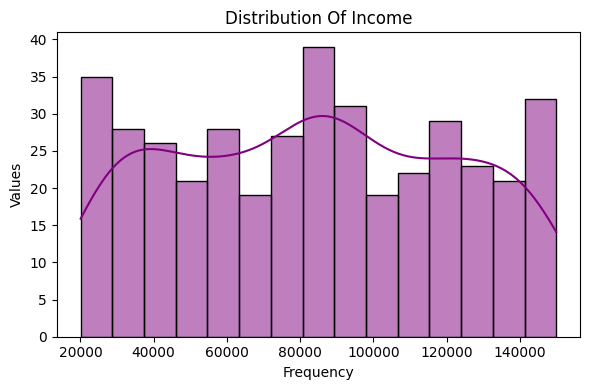

In [63]:
# Histogram For "Income"
plt.figure(figsize=(6,4))
sns.histplot(customer_csv["income"],bins=15,kde=True,color="purple")
plt.title("Distribution Of Income")
plt.xlabel("Frequency")
plt.ylabel("Values")
plt.tight_layout()
plt.show()

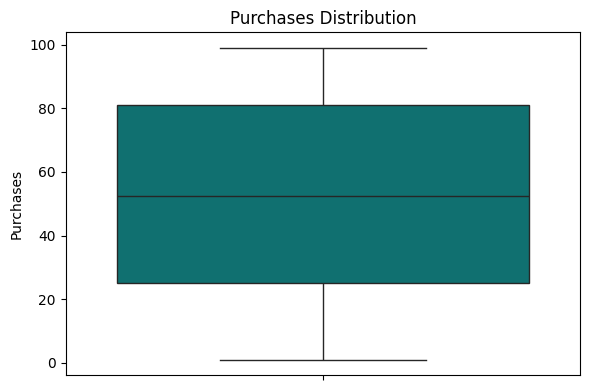

In [64]:
# Boxplot For "Purchases"
plt.figure(figsize=(6,4))
sns.boxplot(customer_csv["purchases"],color="teal")
plt.title("Purchases Distribution")
plt.ylabel("Purchases")
plt.tight_layout()
plt.show()

#### 9. Perform Bivariate Analysis:
#### - Relationship between Gender & Purchases.
#### - Relationship between Income & Churn.

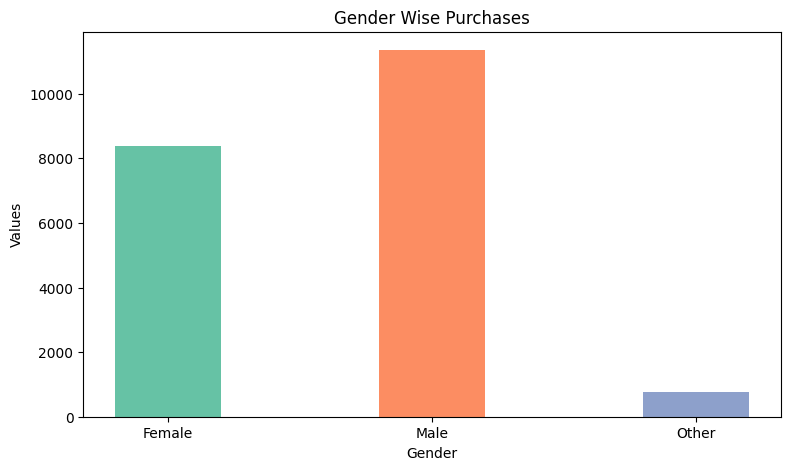

In [65]:
# Now We Will Perform Bivariate Analysis Between Some Variables Which Are Related To Each Other.

# Barplot Of "Gender Wise Purchases"
plt.figure(figsize=(9,5))
gender_purchases = customer_csv.groupby("gender")["purchases"].sum()
plt.bar(x=gender_purchases.index,height=gender_purchases.values,width=0.4,color=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Gender Wise Purchases")
plt.ylabel("Values")
plt.xlabel("Gender")
plt.show()

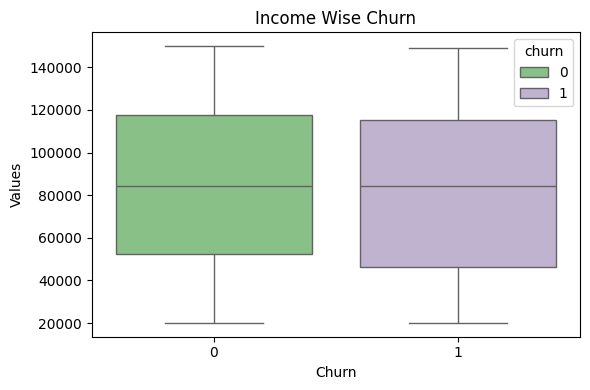

In [66]:
# Boxplot For "Income Wise Churn"
plt.figure(figsize=(6,4))
sns.boxplot(customer_csv,x="churn",y="income",hue="churn",palette="Accent")
plt.title("Income Wise Churn")
plt.xlabel("Churn")
plt.ylabel("Values")
plt.tight_layout()
plt.show()

#### 10. Perform Multivariate Analysis:
#### - Correlation heatmap of all numerical variables.
#### - Pair plots to identify feature interactions.

In [67]:
# Now We Will Perform Bivariate Analysis Between Some Variables Which Are Related To Each Other.

# Heatmap For All Numerical Variables
numeric_data = customer_csv.select_dtypes(include="number")
corr = numeric_data.corr()

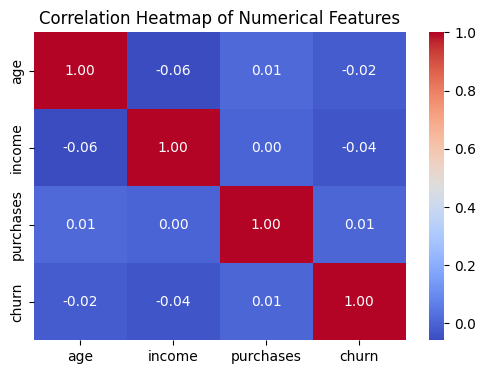

In [68]:
# Ploting The "Heatmap"
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

<Figure size 1000x600 with 0 Axes>

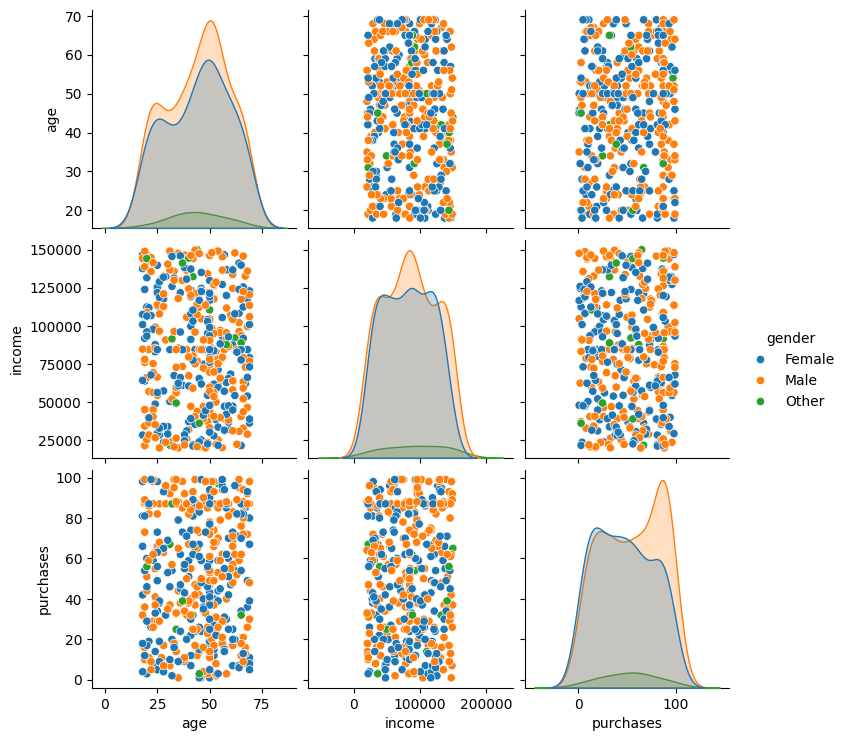

In [69]:
# pairplot for "Feature Interaction"
plt.figure(figsize=(10,6))
columns = ["age","income","purchases"]
sns.pairplot(customer_csv[columns + ["gender"]], hue="gender")
plt.show()

### Part E: Data Profiling

#### 11. Generate a Pandas Profiling Report that summarizes:
#### - Missing values.
#### - Descriptive statistics.
#### - Correlations.
#### - Warnings on potential data quality issues.

In [ ]:
profile_report = ProfileReport(customer_csv,title="Customer Data Report",explorative=True)
profile_report.to_file("customer_data_Report.html")